In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from preprocessor import get_train_environment
from itertools import product
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("FinalData.csv")

In [3]:
df = df.drop("Unnamed: 0", axis=1)

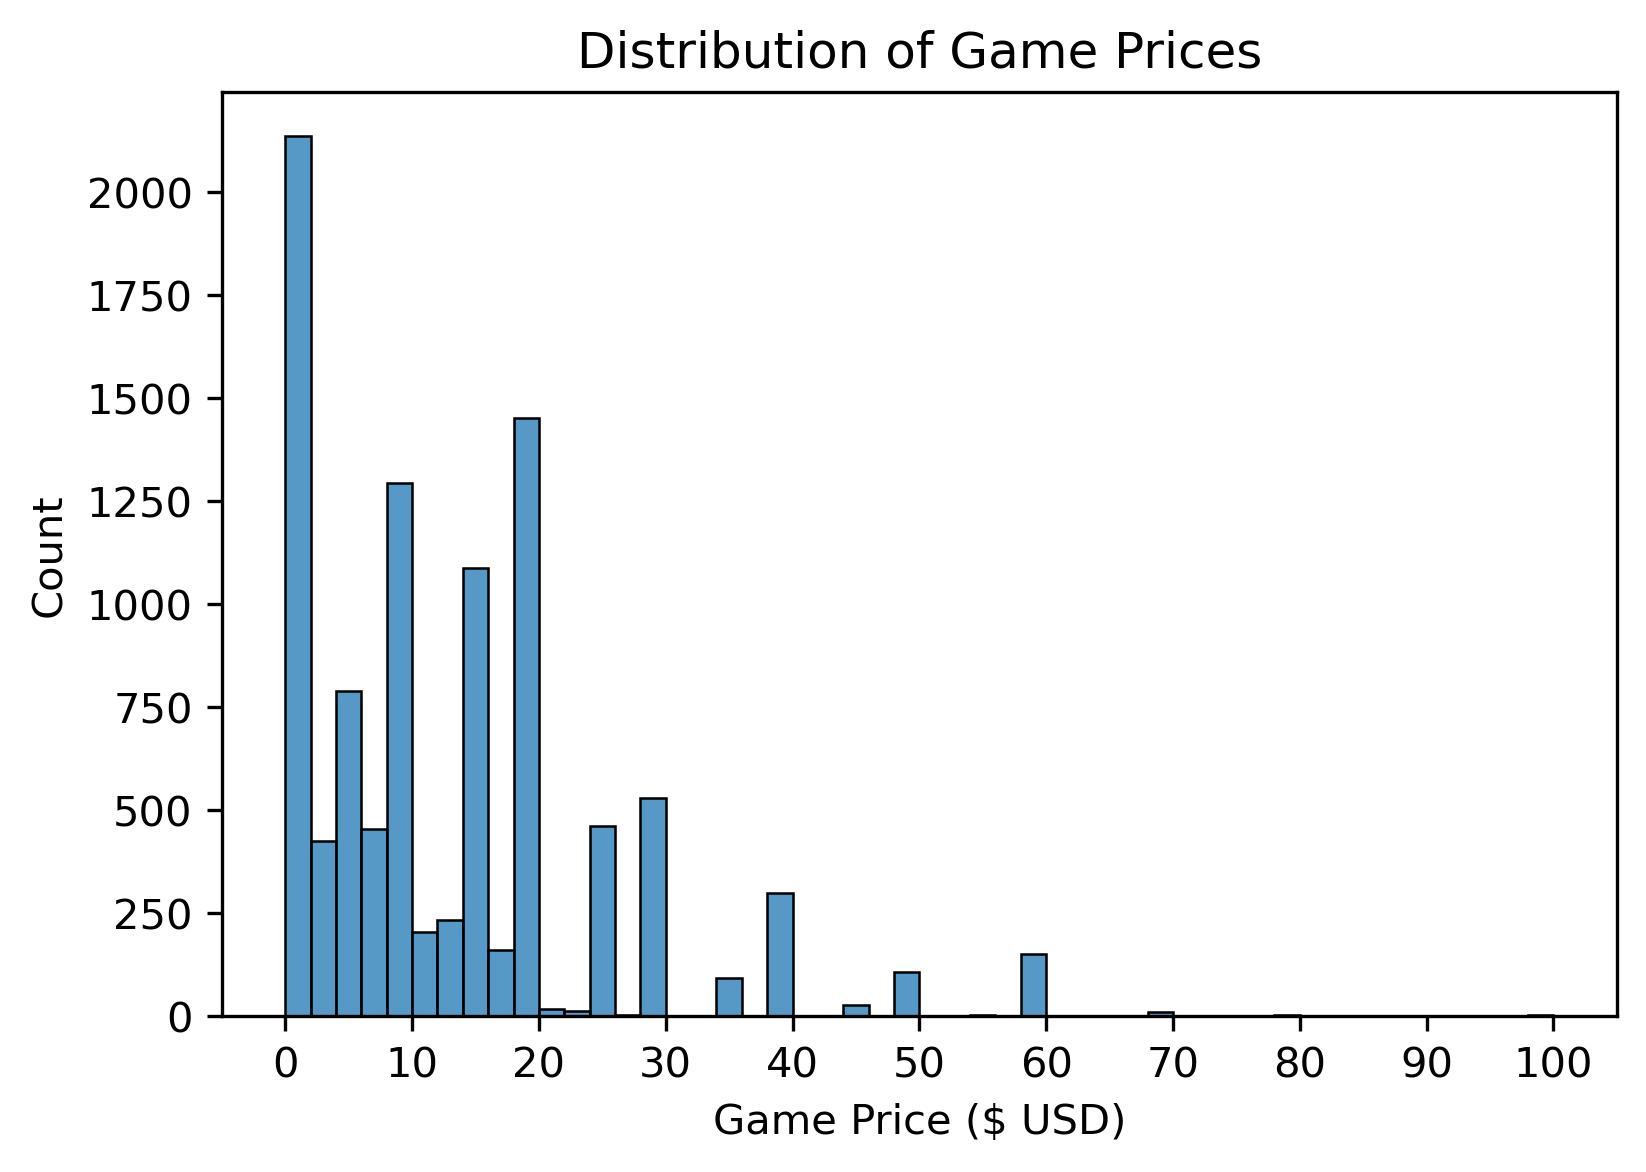

<Figure size 640x480 with 0 Axes>

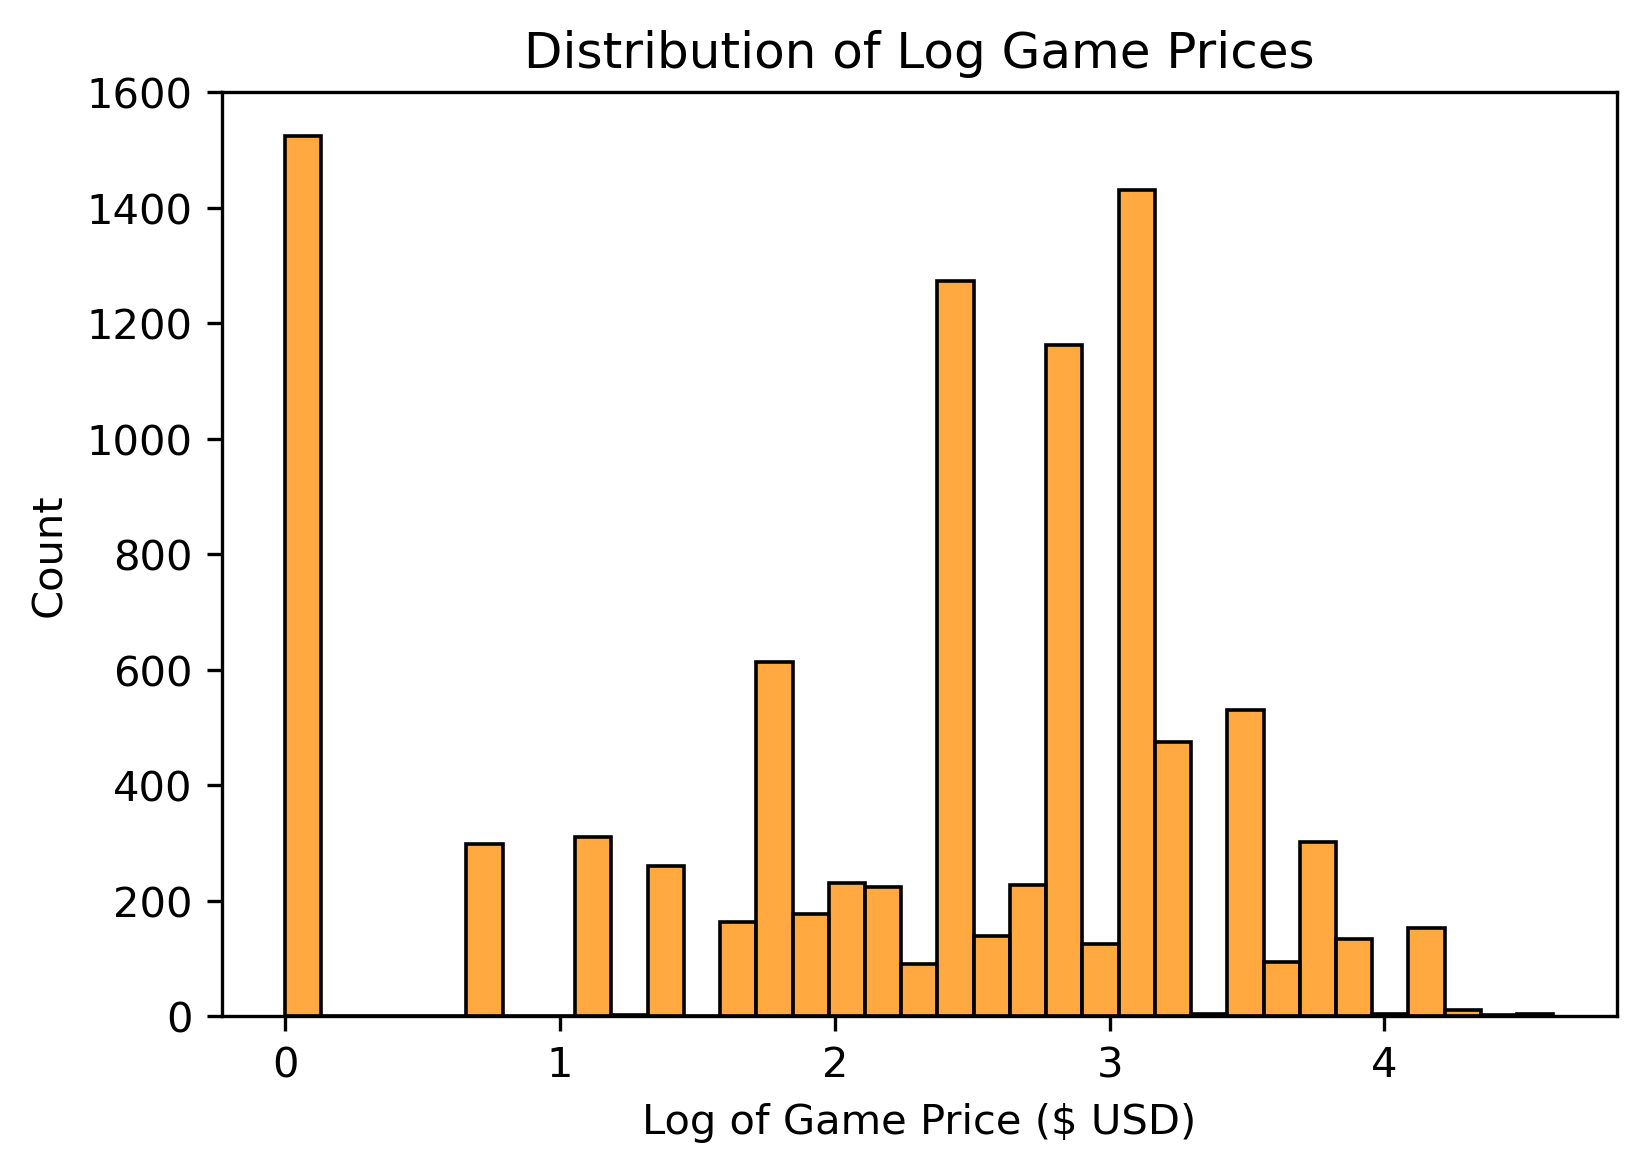

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
fig.set_dpi(300)
hpt = sns.histplot(np.exp(df["ln.pricep1"]) - 1, binwidth=2)
hpt.set_xlabel("Game Price ($ USD)")
hpt.set_title("Distribution of Game Prices")
hpt.set_xticks(range(0, 110, 10))
plt.savefig("priceNoLog.tif", dpi=300, format="tif")
plt.show()
plt.clf()
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
fig.set_dpi(300)
hpt2 = sns.histplot(df["ln.pricep1"], color='darkorange')
hpt2.set_xlabel("Log of Game Price ($ USD)")
hpt2.set_title("Distribution of Log Game Prices")
plt.savefig("priceLog.tif", dpi=300, format="tif")

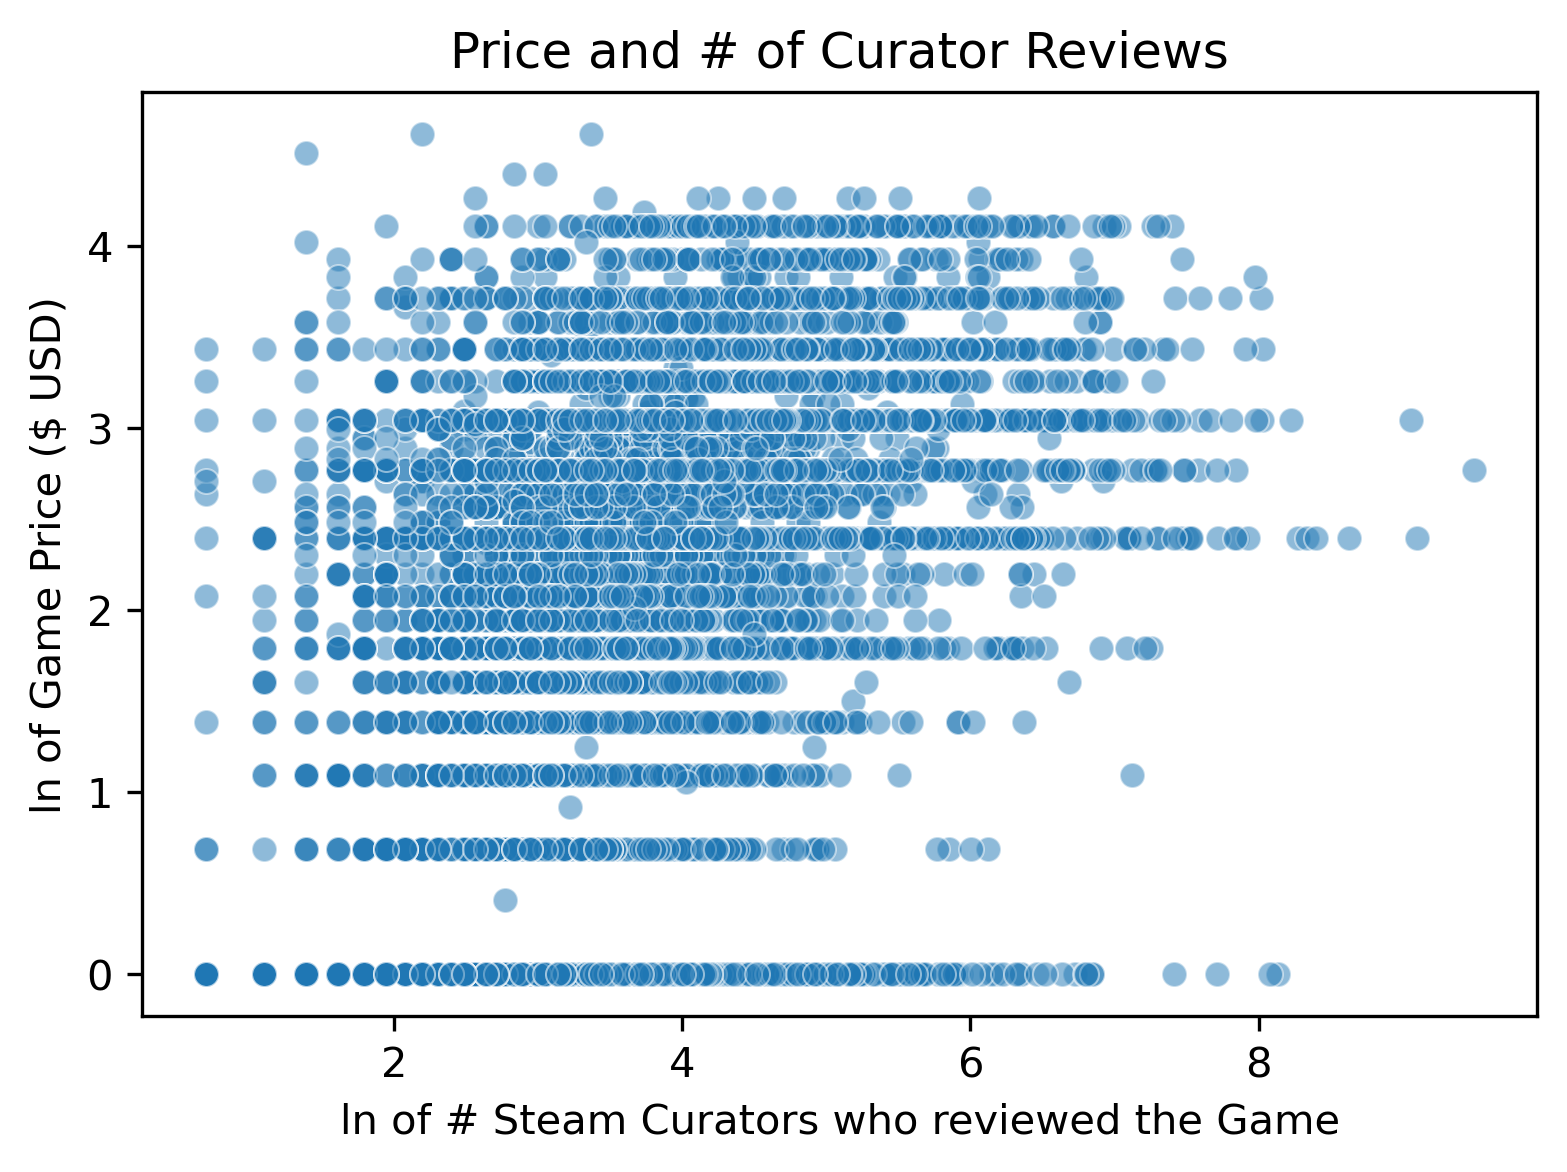

<Figure size 640x480 with 0 Axes>

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
fig.set_dpi(300)
hpt = sns.scatterplot(y="ln.pricep1", x="ln.curatorsp1", alpha=0.5, data=df)
hpt.set_ylabel("ln of Game Price ($ USD)")
hpt.set_xlabel("ln of # Steam Curators who reviewed the Game")
hpt.set_title("Price and # of Curator Reviews")
plt.savefig("pricexCurators.tif", dpi=300, format="tif")
plt.show()
plt.clf()

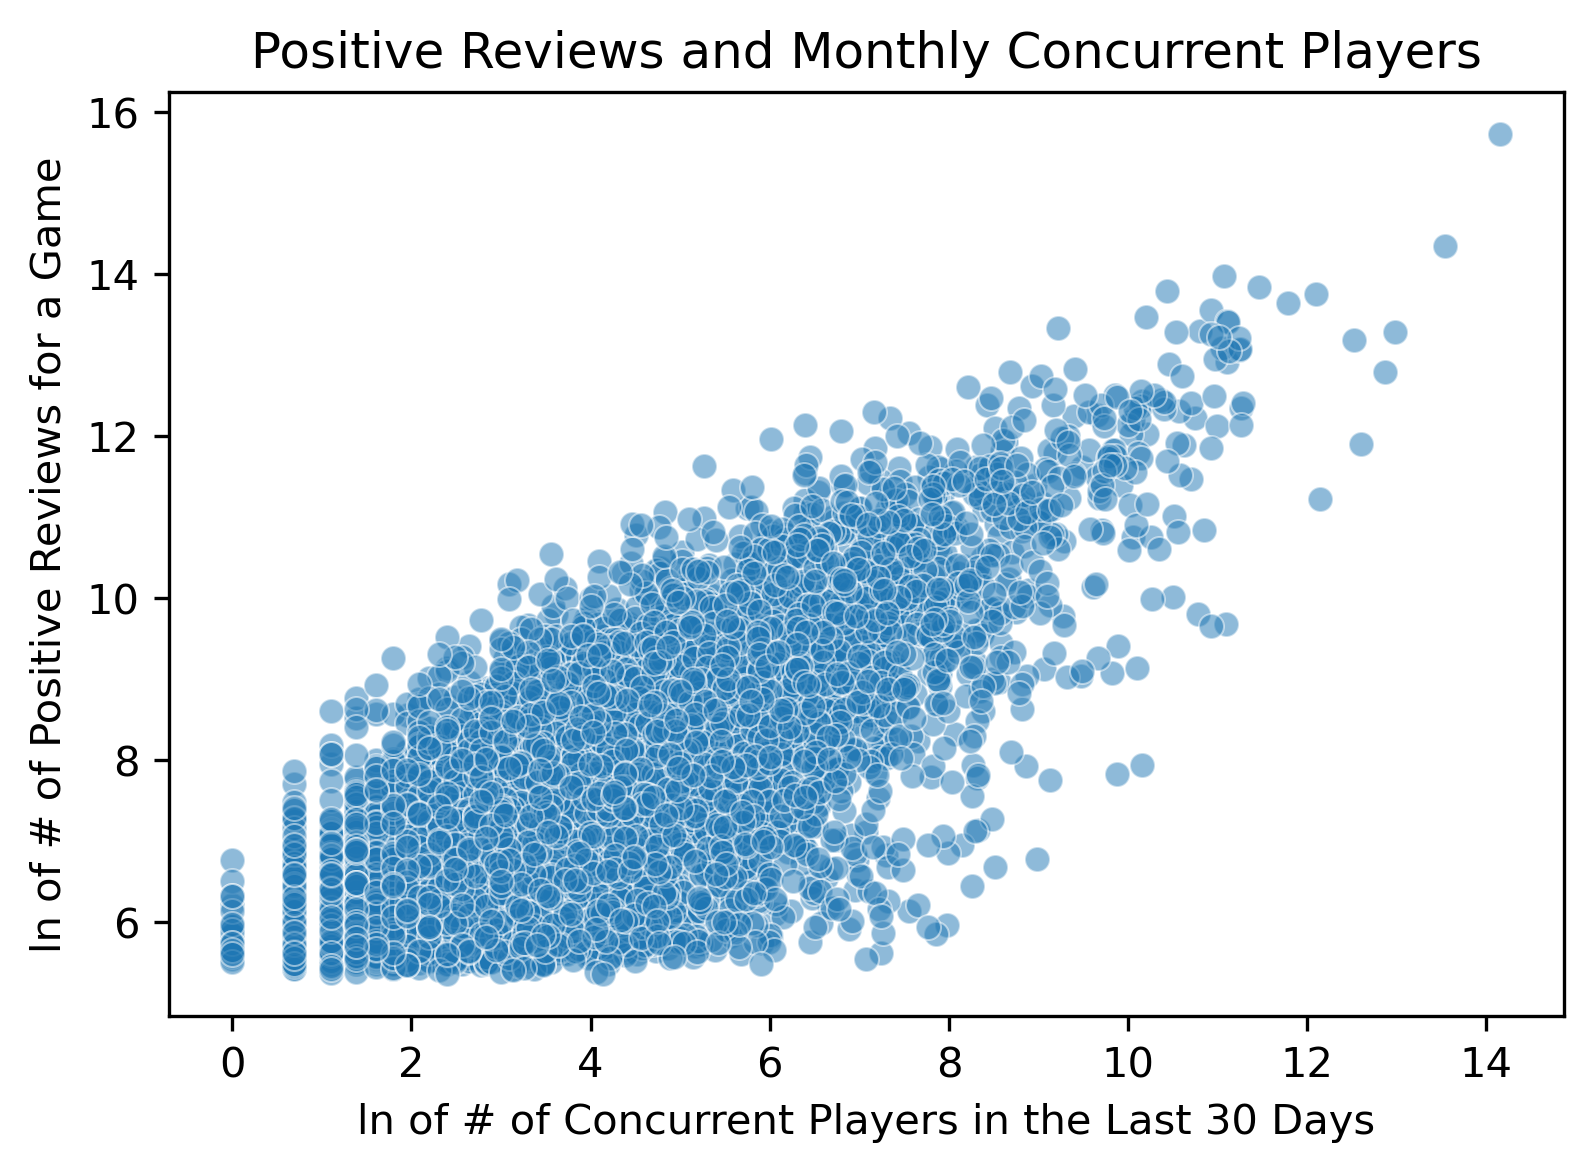

<Figure size 640x480 with 0 Axes>

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
fig.set_dpi(300)
hpt = sns.scatterplot(y="ln.Pos_Reviews", x="ln.last_30_days_avg_ccu", alpha=0.5, data=df)
hpt.set_ylabel("ln of # of Positive Reviews for a Game")
hpt.set_xlabel("ln of # of Concurrent Players in the Last 30 Days")
hpt.set_title("Positive Reviews and Monthly Concurrent Players")
plt.savefig("PRXCCU.tif", dpi=300, format="tif")
plt.show()
plt.clf()

In [26]:
for x in df.keys():
    print(x)

appid
Name
release_date
Single-player
Online Co-op
Shared/Split Screen Co-op
Steam Achievements
Full controller support
Steam Trading Cards
Captions available
Steam Workshop
Steam Cloud
Stats
Includes level editor
Commentary available
Remote Play on Phone
Remote Play on TV
Remote Play Together
dev_Valve
tag_Platformer
tag_Puzzle
tag_Dark Humor
tag_First-Person
tag_Story Rich
genre_Action
genre_Adventure
tag_Sandbox
tag_Gore
tag_Physics
tag_Blood
tag_Violent
genre_Casual
genre_Indie
genre_Simulation
tag_Action Roguelike
tag_Bullet Hell
tag_Pixel Graphics
tag_Roguelite
tag_2D
genre_RPG
LAN Co-op
tag_Farming Sim
tag_Life Sim
tag_Multiplayer
tag_RPG
dev_Supergiant Games
tag_Hack and Slash
tag_Indie
tag_Action
Partial Controller Support
Includes Source SDK
tag_Puzzle Platformer
tag_3D Platformer
tag_Singleplayer
Online PvP
pub_Re-Logic
tag_Open World Survival Craft
tag_Survival
tag_Colony Sim
tag_Base Building
tag_Strategy
genre_Strategy
Tracked Controller Support
tag_FPS
tag_Horror
tag_Fem

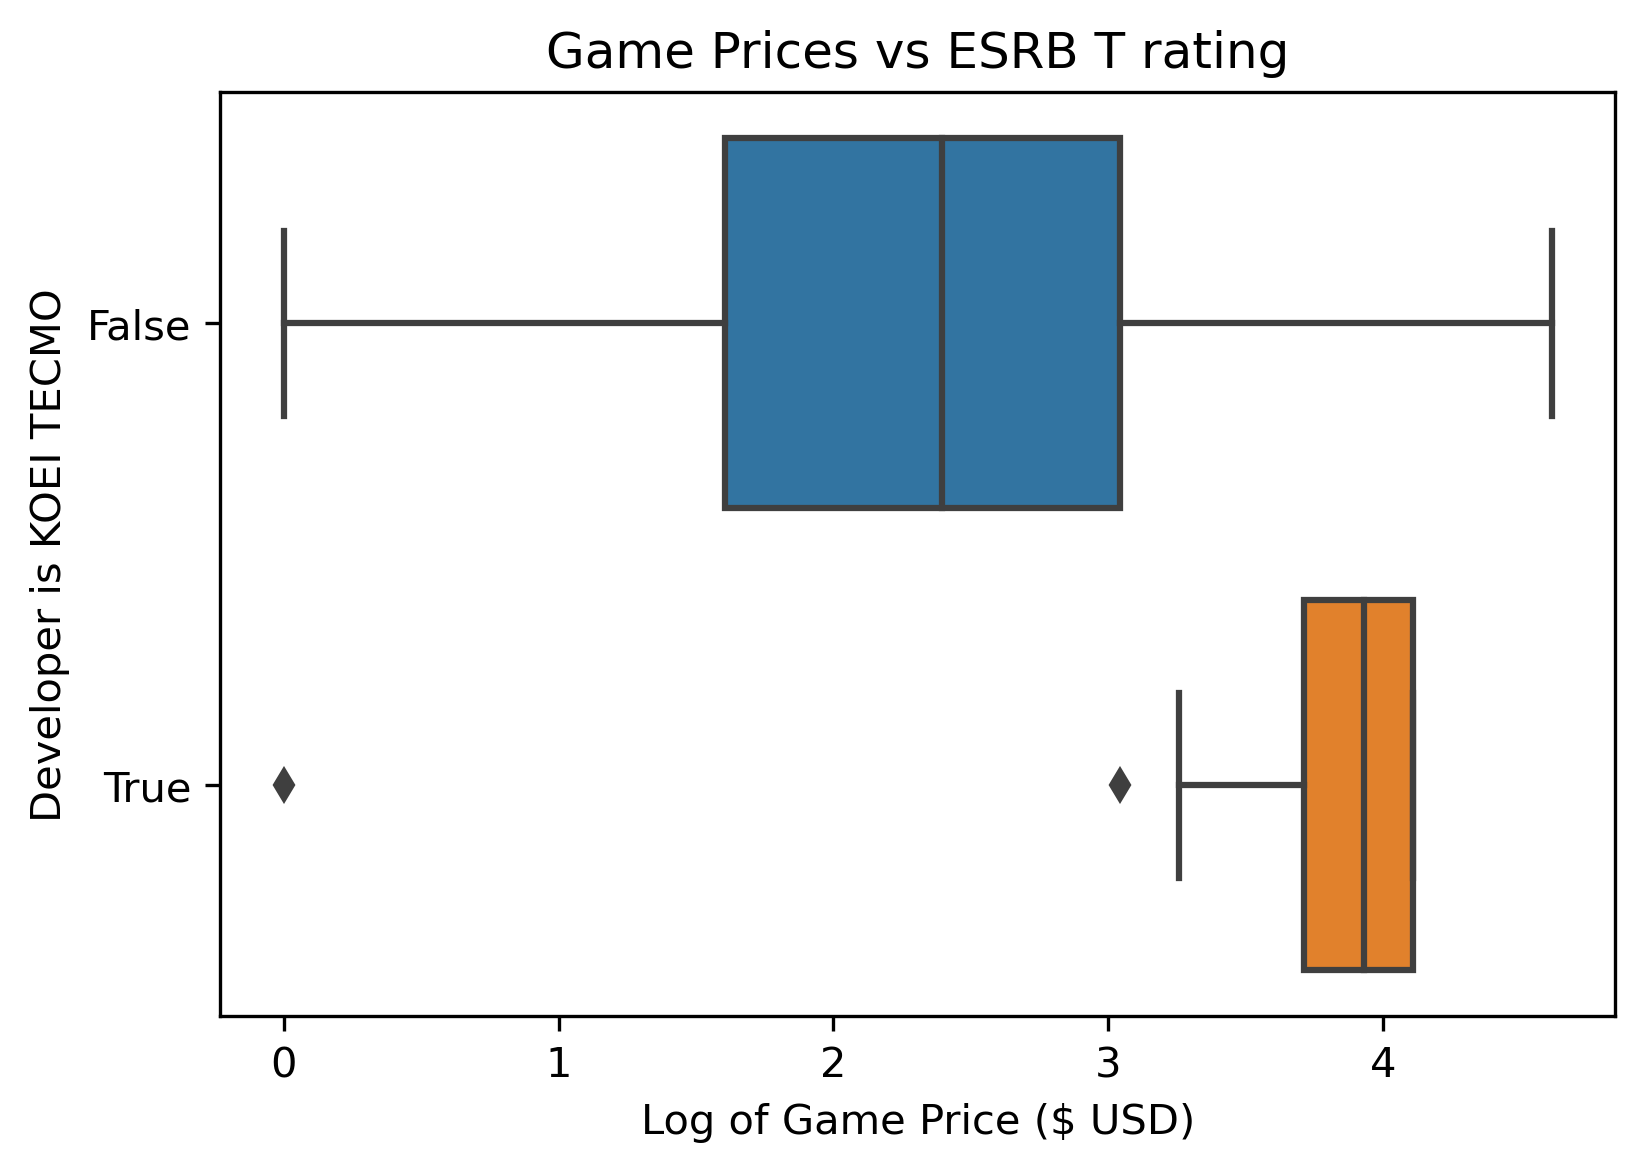

<Figure size 640x480 with 0 Axes>

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
fig.set_dpi(300)
bpt = sns.boxplot(y=df["dev_KOEI TECMO GAMES CO., LTD."] == 1, x=df["ln.pricep1"], orient="h")
bpt.set_xlabel("Log of Game Price ($ USD)")
bpt.set_ylabel("Developer is KOEI TECMO")
bpt.set_title("Game Prices vs ESRB T rating")
plt.savefig("PXESRBT.tif", dpi=300, format="tif")
plt.show()
plt.clf()